## Introduction

Our problem is to build a machine learning model that can predict the price of the house given some information about it. So our Task is to build a regression model : here are the steps that we are going to follow :

1. Data Cleaning
    * Missing Values check
    * Feature Engineering
2. Data Visualization
4. Data Preprocessing
    * Encoding
    * Scaling Data
    * Spliting data
5. Building Models
    * Linear Regression
    * Decision Tree
    * Random Forest
    * K nearest neighbors

## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Getting Data

Now get the data from our chalange 

In [2]:
data = pd.read_csv("house_data/train.csv")
data["LONGITUDE"],data["LATITUDE"]=data["LATITUDE"],data["LONGITUDE"]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",77.597960,12.969910,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",76.644605,12.274538,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",77.632191,12.778033,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",77.344500,28.642300,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",88.484911,22.592200,60.5


We will have a look at the info of our data and check some statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,76.837695,21.300255,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,10.557747,6.205306,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-121.761248,-37.713008,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,73.798100,18.452663,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,77.324137,20.750000,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,77.828740,26.900926,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,152.962676,59.912884,30000.000000


We have to check if we have any missing values that we will need to deal with

In [5]:
data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

So we have 29193 data points with 12 features with 0 missing values: 11 of them are input features and 1 target **TARGET(PRICE_IN_LACS)** 
and also we have 3 non numerical features that we will have to deal with

## Data Cleaning

Let's begin with cleaning our data.
We will start with extracting the city from the adress so we can transfrom it to string

In [6]:
data["ADDRESS"]= data["ADDRESS"].str.split(",").str[-1]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,77.597960,12.969910,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,76.644605,12.274538,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,77.632191,12.778033,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,77.344500,28.642300,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,88.484911,22.592200,60.5


### Feature Engineering

Based on clasification of the cities of india found on https://en.wikipedia.org/wiki/Classification_of_Indian_cities.
The idea is to clasify the cities using a map to help our model perform better 

In [7]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
data['city_tier'] = data['ADDRESS'].apply(map_city)


## Data Visualisation

Now we will have a look at **BHK_OR_RK** we can plot a bar to look at the distribution of the data

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64


<BarContainer object of 2 artists>

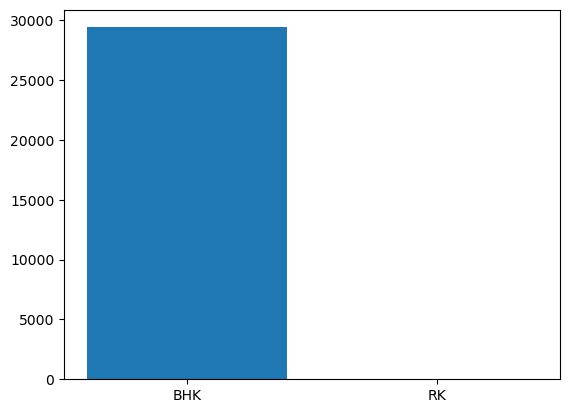

In [8]:
print(data["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],data["BHK_OR_RK"].value_counts())

its clearly that almost all the houses are **BHK** so it makes sens to drop that column.Also we don't need the **ADDRESS** column anymore because we created a city tier 
If we have a look at **POSTED BY** it's clear that it will have no predictive power to help our model so we will just drop it

In [9]:
data.drop(['POSTED_BY',"BHK_OR_RK","ADDRESS"], axis=1, inplace = True)
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,0,0,2,1300.236407,1,1,77.597960,12.969910,55.0,tier1
1,0,0,2,1275.000000,1,1,76.644605,12.274538,51.0,tier2
2,0,0,2,933.159722,1,1,77.632191,12.778033,43.0,tier1
3,0,1,2,929.921143,1,1,77.344500,28.642300,62.5,tier2
4,1,0,2,999.009247,0,1,88.484911,22.592200,60.5,tier1


Now we are intrested to plot a mapbox to look at the distripution of data regards to locations in india for that we will limit the **LONGITUDE** and **LATITUDE** for india

In [10]:
data=data[data["LONGITUDE"].between(65,96) & data["LATITUDE"].between(7,36)]

In [11]:
fig = px.density_mapbox(data,  lon = 'LONGITUDE',lat = 'LATITUDE',
radius = 8,
zoom = 6,
mapbox_style = 'open-street-map'
)
fig.show()


### Encoding

In [12]:
encoder = LabelEncoder()
data["city_tier"]= encoder.fit_transform(data["city_tier"])

### Spliting Data

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being **TARGET(PRICE_IN_LACS)**

In [13]:
training_data = data.drop(["TARGET(PRICE_IN_LACS)"],axis=1)
target = data["TARGET(PRICE_IN_LACS)"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42)

### Scaling

In [15]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Building Models

### LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train, y_train)

0.2504234817696759

### Decision Tree

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9158995033049872


### Random Forest

In [18]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9397891721595164
